# Análises do Evento de vendaval no município de São José dos Campos em 09 de Março de 2021

Eventos extremos podem ocorrer em diferentes grandezas, como chuvas, ventos e nível de rios. Tais extremos podem deflagar desastres naturais/socioambientais - processos complexos que envolvem construções sociais e gatilhos naturais. O evento meteorológico extremo que ocorreu no dia 09 de março de 2021 em São José dos Campos, interior de São Paulo, pode ser classificado como um Vendaval. Mesmo não havendo registros de inundações ou deslizamentos/movimentos de massa nessa data na cidade, o vendaval gerou diversos impactos aos cidadãoes joseenses, especialmente pelas quedas de árvores e galhos e pela interrupção do fornecimento de energia elétrica - essa é a justificativa para o trabalho aqui apresentado.

## Análises Meteorológicas

Fala do Meteorologista e Pesquisador Giovanni Dollif sobre o processo meteorológico: https://g1.globo.com/sp/vale-do-paraiba-regiao/noticia/2021/03/10/meteorologista-aponta-que-sao-jose-dos-campos-foi-atingida-por-tornado.ghtml

Registra-se, ainda, que a taxa de precipitação chegou a 7 mm em 10 min, com acumulado da ordem de 50 mm para todo o evento em alguns pontos da cidade (referência pelo pluviômetro do Cemaden situado no Parque Tecnológico de São José dos Campos). O total esperado para o mês de março na cidade é de aproximadamente 150 mm. A título de comparação, no evento de 06 de março de 2015, a taxa de precipitação chegou a 15 mm em 10 minutos, acumulando 59 mm em um intervalo de 1 hora (Santos et al., 2015).

### Nível de chuva

#### Importando as bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

#### Lendo os dados de nível de chuva [mm] no dia do evento

In [ ]:
df = pd.read_csv("data.csv", sep=';', index_col=False) # Lendo o CSV
df.columns=df.columns.str.replace('\t','')  # Ta separado por ; mas tem uns tabs aleatórios, aqui vai limpar os tabs do nome das colunas
df['valorMedida']=df['valorMedida'].str.replace('\t','.').astype(float) # tirando os tabs dos valores e transformando em inteiro
df['latitude']=df['latitude'].str.replace('\t','.') # mesma coisa pra latitude
df['longitude']=df['longitude'].str.replace('\t','.') # e longitude
converting = timedelta(hours = 3) # convertendo de utc -3h pra hora local
df["datahora"] = pd.to_datetime(df["datahora"]) - converting # transformando a coluna de data e hora no tipo datetime

#### Dividindo os dados só para o horário do ocorrido

In [ ]:
start_time = pd.to_datetime("2021-03-09 17:00:00") # definindo o começo dos dados
finish_time = pd.to_datetime("2021-03-10 21:00:00") # definindo o fim dos dados
df = df[df['datahora'] > start_time ]
df = df[df['datahora'] < finish_time ]
estacoes = set(df['nomeEstacao'])

#### Plot para cada estação meteorológica 

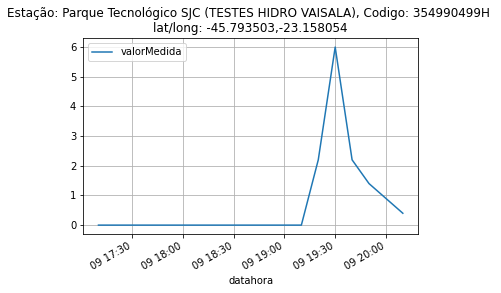

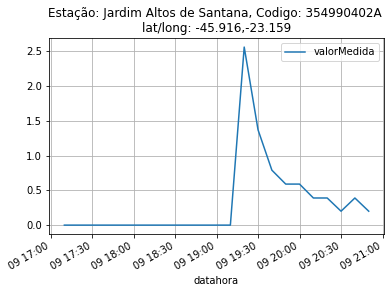

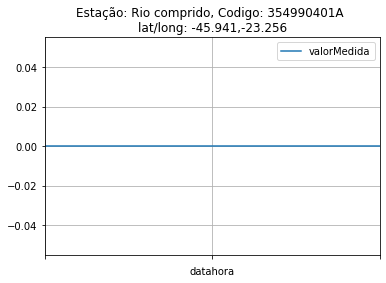

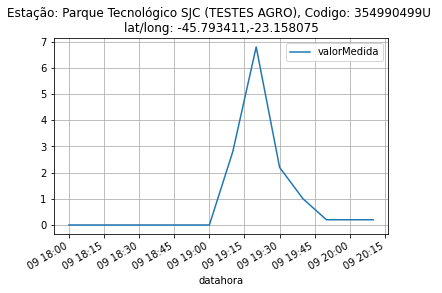

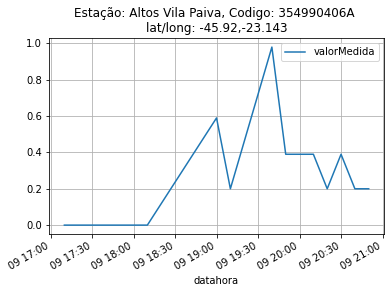

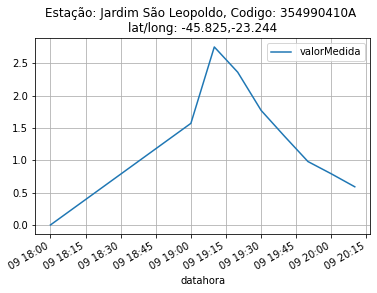

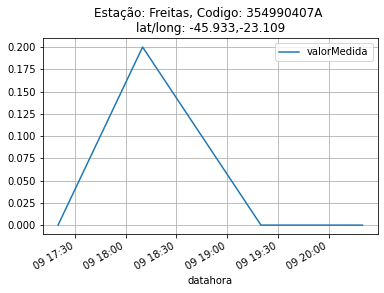

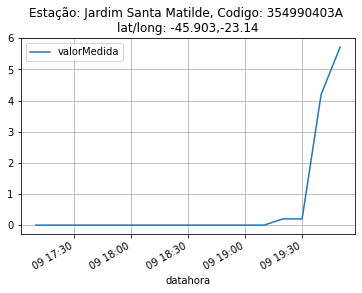

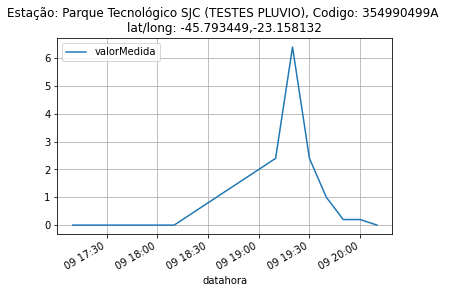

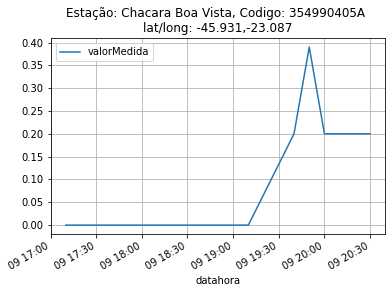

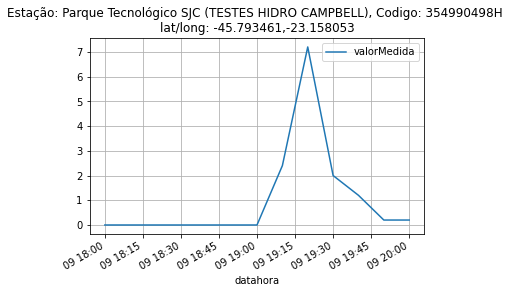

In [ ]:
for estacao in estacoes: # pra percorrer todas as estações únicas
    cod = set(df[df['nomeEstacao'] == estacao]["codEstacao"]) # guardando o código
    lat = set(df[df['nomeEstacao'] == estacao]["latitude"]) # a latitude
    long = set(df[df['nomeEstacao'] == estacao]["longitude"]) # a longitude
    title = f"Estação: {estacao}, Codigo: {list(cod)[0]} \nlat/long: {list(lat)[0]},{list(long)[0]}" # pra colocar no título de cada uma
    df[df["nomeEstacao"] == estacao].plot(x = 'datahora', y = "valorMedida", title = title, grid = True) # fazendo o gráfico com um slicing pra cada estação





#### Plot para todas as estações meteorológicas juntas

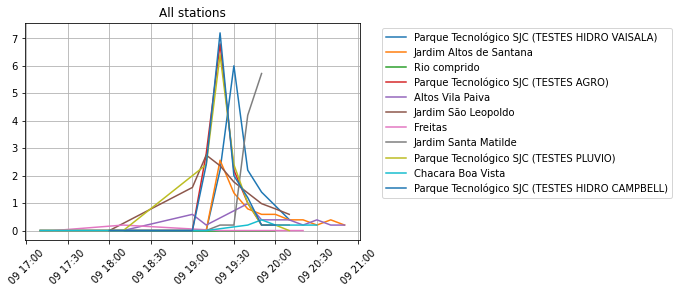

In [ ]:
# agora gráfico com todas as estações
plt.figure() # Criando a figura
plt.title("All stations") # Titulo
plt.grid()
for i in estacoes:
    plt.plot(df[df['nomeEstacao'] == i]["datahora"], df[df['nomeEstacao'] == i]["valorMedida"], label = i) # Fazendo o plot
plt.xticks(rotation=45) # Rodando os ticks pra não ficar atropelando
plt.legend(bbox_to_anchor=(1.05, 1)) # mudando a legenda pra fora do gráfico
plt.show() # mostrando o gráfico

### Formação de nuvens 


A animação de imagens de satélite mostra a rápida formação de nuvens carregadas (convecção profunda), na região e horário onde foram registradas as descargas elétricas na atmosfera, o vento no aeroporto, a chuva e os estragos na cidade.  A forma da convecção nas imagens não mostra um formato claro, mas há semelhança com o padrão de uma linha de instabilidade (https://www.sciencedirect.com/topics/earth-and-planetary-sciences/squall-line, https://www.nssl.noaa.gov/education/svrwx101/thunderstorms/types/ ) . São necessárias análises mais detalhadas, possivelmente de dados de Radar Meteorológico (preferencialmente de Banda X), para uma classificação mais confiável.


### Ocorrências de raios

A figura (abaixo) de acumulados de descargas elétricas na atmosfera revelam uma significativa concentração de registros dentro do município de São José dos Campos entre 18h e 20h.


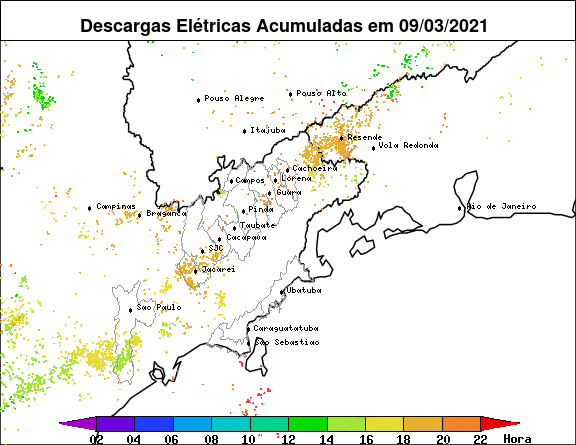

## Análise da mobilidade urbana nas regiões mais afetadas pelo vendaval

O setor de transportes e mobilidade está entre os mais afetados por eventos meteorológicos intensos. No evento de 09 de março de 2021 em São José dos Campos/SP não foi diferente.

Interessado nas características temporais, espaciais e espaço-temporais da mobilidade urbana em São José dos Campos/SP? Aqui está um artigo científico novinho em folha sobre o tema:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0248126



### Origem

A Figura abaixo mostra um mapa com o número de pessoas que fizeram viagem com início entre 18h e 20h com origem nas Zonas de Tráfego (ZTs) 14 (Jd. Aquarius e Colinas) e 32 (Jd. Alvorada e Jd. das Indústrias). Nota-se que há um grande número de pessoas que se deslocam dentro da própria zona. Desconsiderando esses deslocamentos intrazonas, as ZTs 28, 34, 29 e 30 são as que recebem maior fluxo de pessoas com origem nas ZTs 14 e 32.


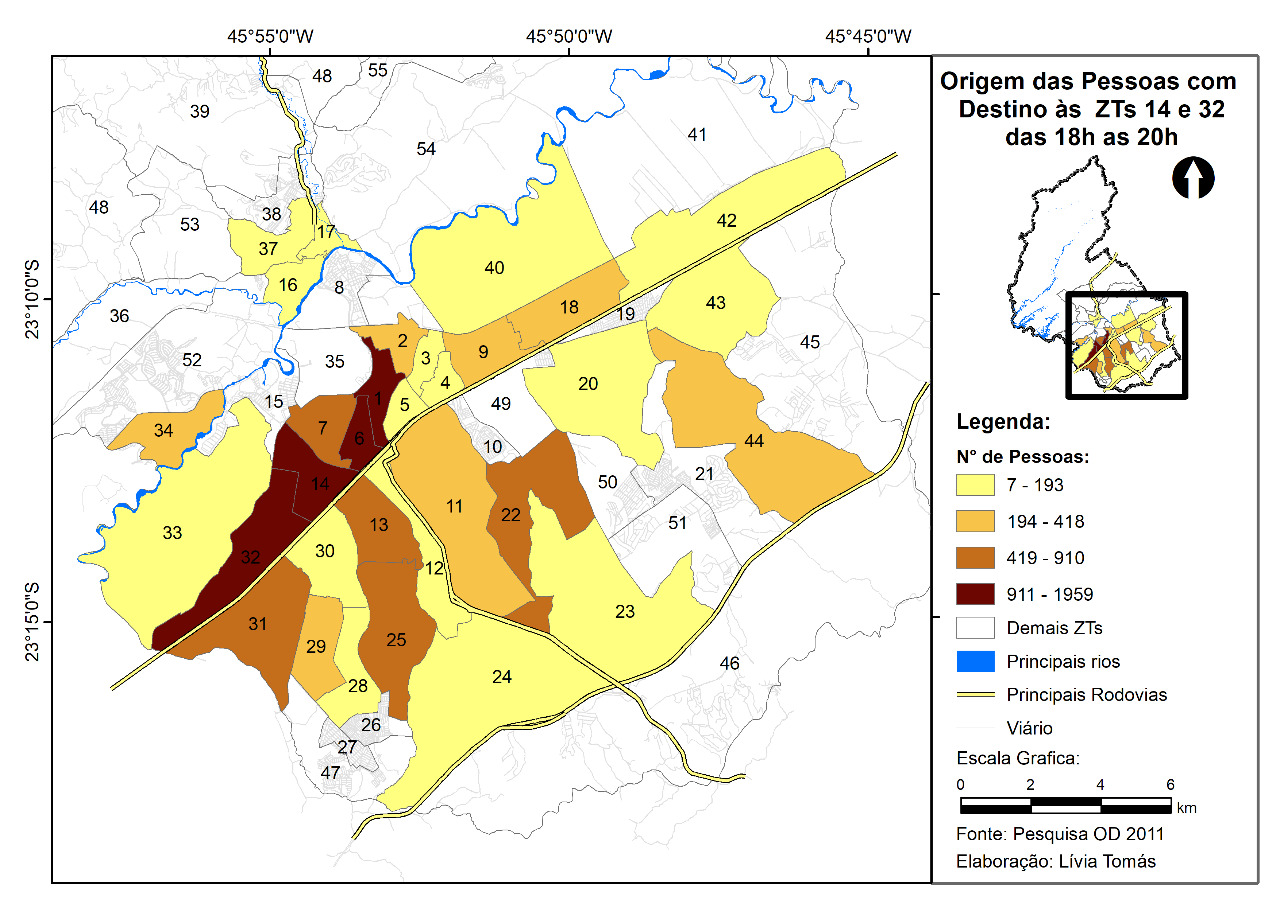

### Destino

A Figura abaixo, por sua vez, traz um mapa com o número de pessoas que fizeram viagem com início entre 18h e 20h com destino às Zonas de Tráfego (ZTs) 14 (Jd. Aquarius e Colinas) e 32 (Jd. Alvorada e Jd. das Indústrias). Nota-se que há um grande número de pessoas que se deslocam dentro das próprias zonas analisadas. Desconsiderando esses deslocamentos intrazonas, as ZTs 1 e 6 são as que possuem maior fluxo de pessoas com destino às ZTs 14 e 32, seguidas pelas ZTs 31, 7, 25 e 13 respectivamente. Os dados de mobilidade urbana analisados referem-se à Pesquisa Origem-Destino realizada em 2011.


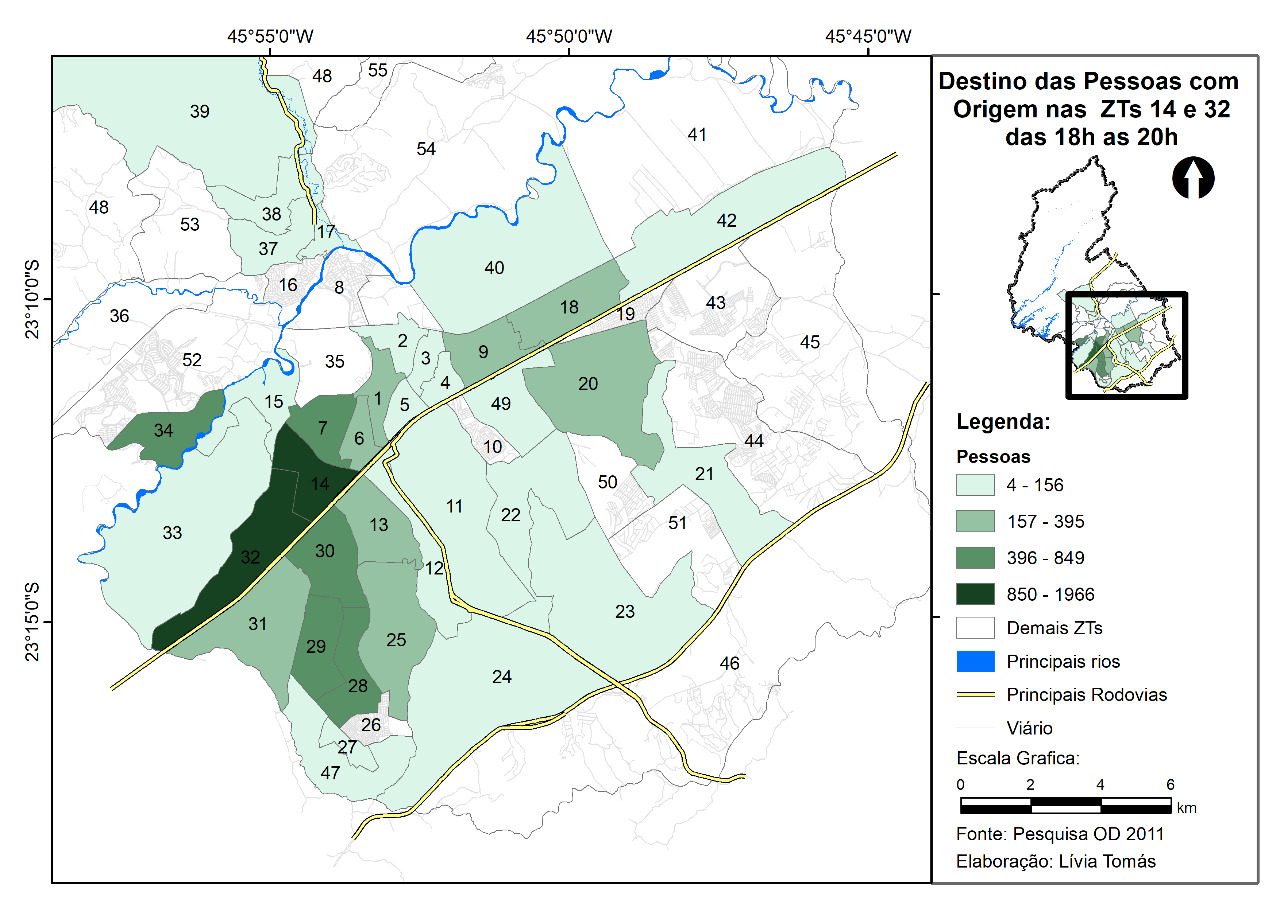

## Análise dos impactos do evento sob a perspectiva de redes complexas

A partir de dados do sistema viário de São José dos Campos/SP, obtidos através da plataforma OpenStreetMaps, foi construída uma rede de arruamento através da aplicação gis4graph (https://github.com/aurelienne/gis4graph).
O grafo (objeto computacional que representa a rede), conta com 1184 ruas e foi construído com base no sistema viário da região Oeste do município, devido ao alto impacto gerado na região em consequência do vendaval. A imagem abaixo mostra o sistema viário do município


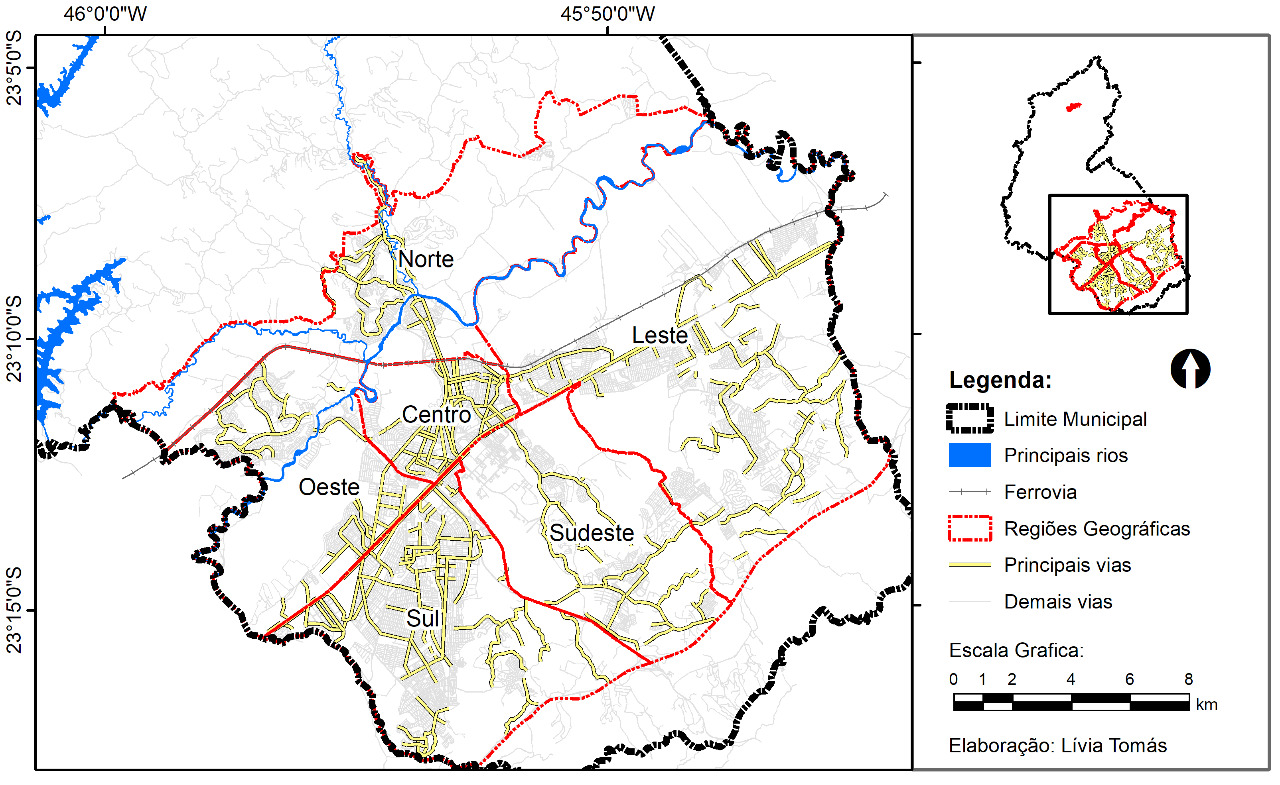

### Beneficios da abordagem de redes

Através de uma abordagem de redes é possível obter medidas que indiquem quais ruas, quando interditadas, geram um maior impacto na eficiência geral da mobilidade na cidade. Este tipo de análise é especialmente útil em casos de eventos intensos como o do dia 09 de Março, onde diversas vias públicas tornam-se inacessíveis, e devido a escassez de recursos é necessário priorizar a restauração do acesso às vias mais importantes, algo que nem sempre é algo evidente. Deste modo, métricas como o índice de vulnerabilidade  podem ser úteis como suporte  à tomada de decisões sobre quais vias devem ser priorizadas. 


### Cálculo do Índice de Vulnerabilidade

A eficiência $e_{ij}$ na comunicação entre os nós $i$ e $j$ é inversamente proporcional ao comprimento do seu menor caminho, i.e.,  $e_{ij} \sim {1}/{d_{ij}}$. Vamos considerar um grafo $G = (V, L)$, onde $V$ é o conjunto de $|V|= N$ nós e $L$ é o conjunto de $|L| = M$ arestas. Dado que $E$ é a eficiencia global, e dado que $V_{k}$ é a vulnerabilidade associada ao vértice (ou aresta) $k$ do grafo $G$,  a vulnerabilidade $V_{k}$ associada a um elemento $k$ será dada por
$V_{k}$ = $\frac{E - E_{k}^{\star}}{E}$, onde $E_{k}^{\star}$ é a eficiência do grafo após a desconexeão do elemento $k$ .

### Mapa de Vulnerabilidade

A Figura abaixo mostra a aplicação do índice de vulnerabilidade topológico na região Oeste do município, indicando que é possível haver uma perda de eficiência de até 3% na mobilidade da rede em caso da interdição de determinadas vias. Dentre as mais vulneráveis, além da Rodovia Presidente Dutra, estão inclusas tanto avenidas, como a Av. São João e Av. Possidônio José de Freitas, quanto ruas, como as R. Emílio Marelo e R. Carlos Marcondes.

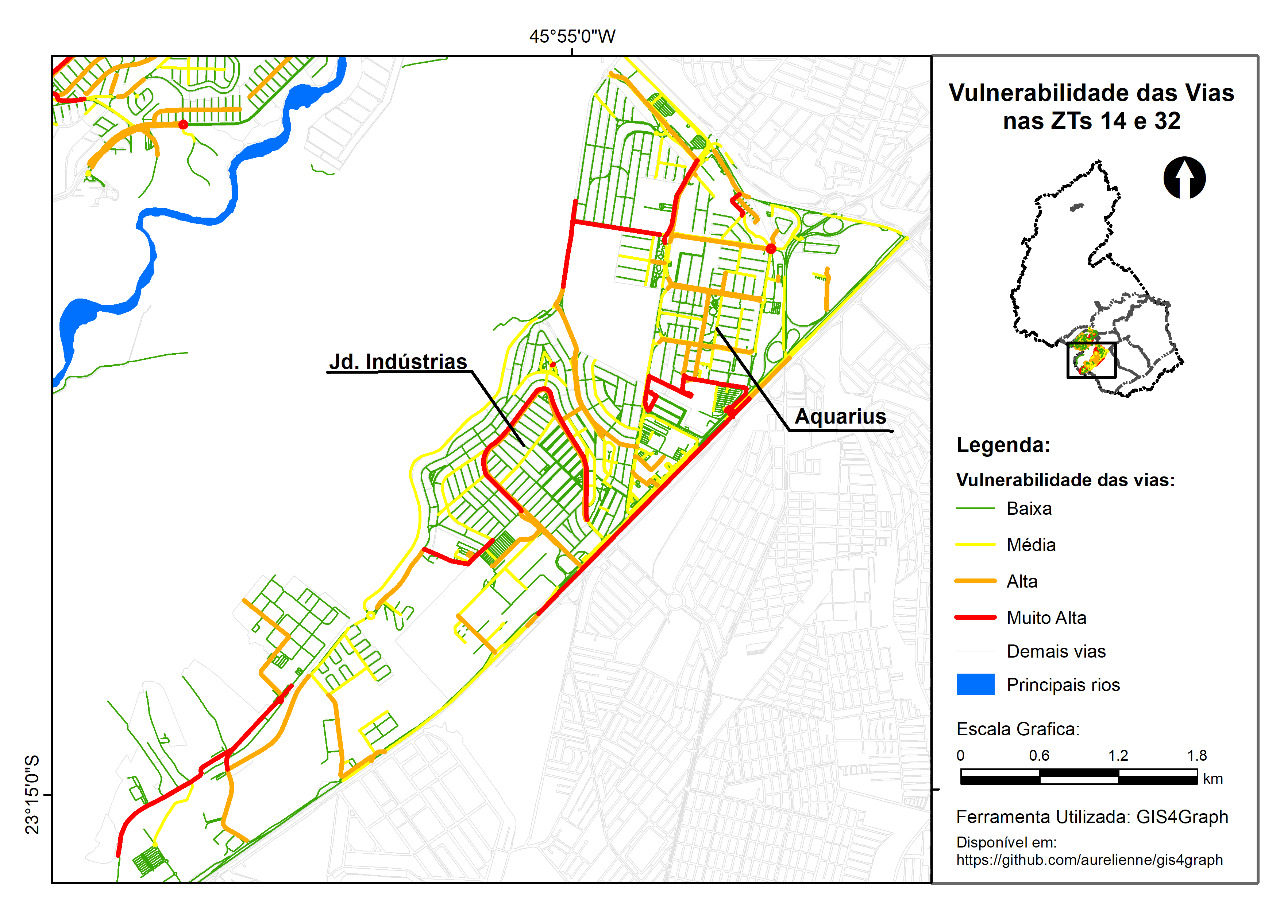